<a href="https://colab.research.google.com/github/johncduran/datasci_6_regression/blob/main/HHA_507_WK_7_Assignment_6b_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt


!pip install ucimlrepo
!pip install --upgrade statsmodels



Here I am importing the necessary packages to perform the multiple regression

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
liver_disorders = fetch_ucirepo(id=60)




This dataset was sourced from the UC Urvine Machine Learning Repository. This command which was provided by the university fetches the specific dataset of liverdisorders located in the following URL: https://archive.ics.uci.edu/dataset/60/liver+disorders


In [3]:
print(liver_disorders)


{'data': {'ids': None, 'features':      mcv  alkphos  sgpt  sgot  gammagt
0     85       92    45    27       31
1     85       64    59    32       23
2     86       54    33    16       54
3     91       78    34    24       36
4     87       70    12    28       10
..   ...      ...   ...   ...      ...
340   99       75    26    24       41
341   96       69    53    43      203
342   98       77    55    35       89
343   91       68    27    26       14
344   98       99    57    45       65

[345 rows x 5 columns], 'targets':      drinks
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
..      ...
340    12.0
341    12.0
342    15.0
343    16.0
344    20.0

[345 rows x 1 columns], 'original':      mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
0     85       92    45    27       31     0.0         1
1     85       64    59    32       23     0.0         2
2     86       54    33    16       54     0.0         2
3     91       78    34    24       36     0.0      

Here I am printing to make sure that the dataset was fetched correctly.

In [4]:
df = liver_disorders
df

{'data': {'ids': None,
  'features':      mcv  alkphos  sgpt  sgot  gammagt
  0     85       92    45    27       31
  1     85       64    59    32       23
  2     86       54    33    16       54
  3     91       78    34    24       36
  4     87       70    12    28       10
  ..   ...      ...   ...   ...      ...
  340   99       75    26    24       41
  341   96       69    53    43      203
  342   98       77    55    35       89
  343   91       68    27    26       14
  344   98       99    57    45       65
  
  [345 rows x 5 columns],
  'targets':      drinks
  0       0.0
  1       0.0
  2       0.0
  3       0.0
  4       0.0
  ..      ...
  340    12.0
  341    12.0
  342    15.0
  343    16.0
  344    20.0
  
  [345 rows x 1 columns],
  'original':      mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
  0     85       92    45    27       31     0.0         1
  1     85       64    59    32       23     0.0         2
  2     86       54    33    16       54     0.

For easier use later on I renamed the dataset to df.

#### Error 1
Even though I had successfully imported the dataset using the code that was provided to me by UC Urvine I did run into issues later on in the notebook with it reading the columns inside of the dataset. When tryign to find the VIF data.


#### Solution

I was able to instead load in the dataset and then save it as a CSV file within the notebook. This then allowed the code to read the columns within which is the following code underneath.


In [5]:
import requests
import pandas as pd
from io import StringIO

csv_url = 'https://archive.ics.uci.edu/static/public/60/data.csv'

response = requests.get(csv_url)


if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
    print(df.head())
else:
    print(f"Failed to download the CSV file. Status code: {response.status_code}")


   mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
0   85       92    45    27       31     0.0         1
1   85       64    59    32       23     0.0         2
2   86       54    33    16       54     0.0         2
3   91       78    34    24       36     0.0         2
4   87       70    12    28       10     0.0         2


As can be seen the dataset was successfully read and it printed out the columns that I required.

In [6]:
df.columns
print(df.columns)

Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'], dtype='object')


 This is just to double-check that it is being read properly.

# Analysis

In [7]:
listofpredictors = df[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']]

Here are all the independent variables that I am creating a dedicated variable for.

In [8]:
target = df[['drinks']]

Here is the dependent variable that I am also creating a dedicated variable for.

In [9]:
# Fit the regression model
X = sm.add_constant(listofpredictors)  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['drinks'], X)
print(model)


     const  mcv  alkphos  sgpt  sgot  gammagt
0      1.0   85       92    45    27       31
1      1.0   85       64    59    32       23
2      1.0   86       54    33    16       54
3      1.0   91       78    34    24       36
4      1.0   87       70    12    28       10
..     ...  ...      ...   ...   ...      ...
340    1.0   99       75    26    24       41
341    1.0   96       69    53    43      203
342    1.0   98       77    55    35       89
343    1.0   91       68    27    26       14
344    1.0   98       99    57    45       65

[345 rows x 6 columns]


Here I am putting both the indpendent and dependent variables into a single model to use later on in the results.

In [10]:
results = model.fit()
# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 drinks   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     15.73
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           6.26e-14
Time:                        22:07:26   Log-Likelihood:                -868.88
No. Observations:                 345   AIC:                             1750.
Df Residuals:                     339   BIC:                             1773.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9624      3.413     -4.384      0.0

These are the results of the regression analysis. In this case the R-squared value of 0.188 means that 18.8% of the 'drinks' can be explained by the model.

In [11]:
residuals = results.resid
fitted = results.fittedvalues

Here I am creating residual and fitted variables using the results inorder to use them later on in the Q-Q plot.

In [13]:
# VIF data
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)



VIF Data:
  Variable         VIF
0    const  437.910698
1      mcv    1.059993
2  alkphos    1.030420
3     sgpt    2.307708
4     sgot    2.419507
5  gammagt    1.483186


Here the VIF test shows how much multicolenarity there is between the independent variables. Meaning how much correleation there is between the indpendent variables in the regression. Here there are some low leveles of multicolineratiy such as 'mcv', 'alkphos', and 'gammagt'. These are considered low since their values are closer to 1. The variables 'sgpt', and 'sgot' have a moderate level of multicolinerarity since their values are above 1.

In [14]:
#Rainbow test
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.261899499819391, p-value=0.06581045455128941


Since the p-value of the Rainbow Test is 0.065 which is greater than 0.05 that means that there is linearity in this model. This means that the null hypothesis is true, meaning the true model is linear.

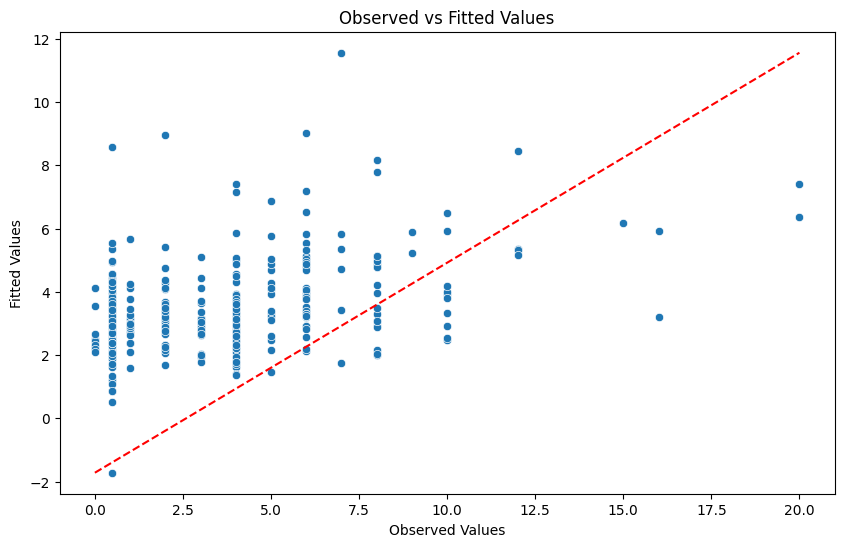

In [23]:

#Observed vs fitted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['drinks'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['drinks']), max(df['drinks'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()


It would appear that this model will would need adjustments as the plotted points are scattered thorughout the plot. This test shows that there might be discprepencies between the models predictions and the actual data. There are only a few points that are on the 45 degree line and near it, with the majority being far away.

Shapiro-Wilk Test: W=0.9287992715835571, p-value=9.13340063302126e-12


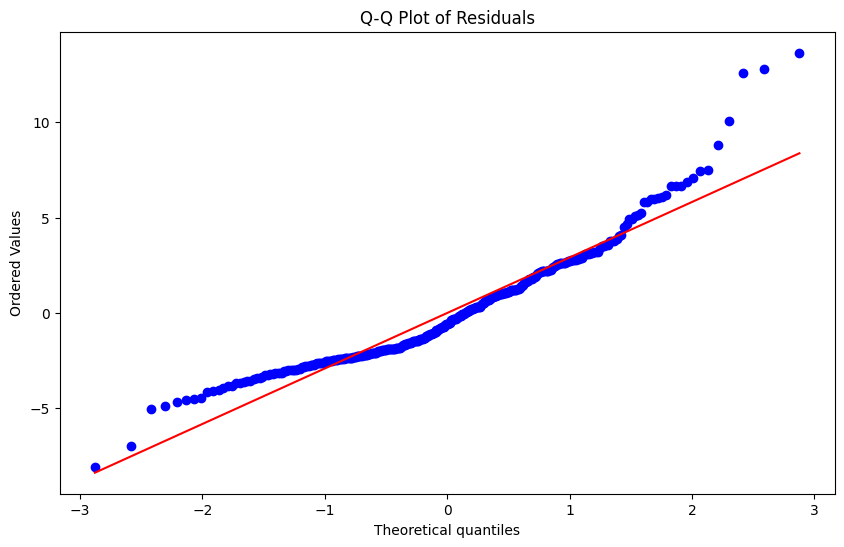

In [24]:
#Shapiro-Wilk Test
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

#Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


With this graph most of the points are following the line until the very end where it deviates a bit and the tail end of it becomes lighter in density. This would suggest for the most part that the residuals are normally distributed. The p-value of the Shapiro-Wilk test is well below the 0.05 value at 9.13340063302126e-12. This means that we should reject the null hypothesis meaning the data does not follow a normal distribution.

This is a bit odd since the p-value and the q-q plot are showing me two different results and I am not sure what that is.


Goldfeld-Quandt Test: F-statistic=2.6784737430458785, p-value=2.355242749713596e-10


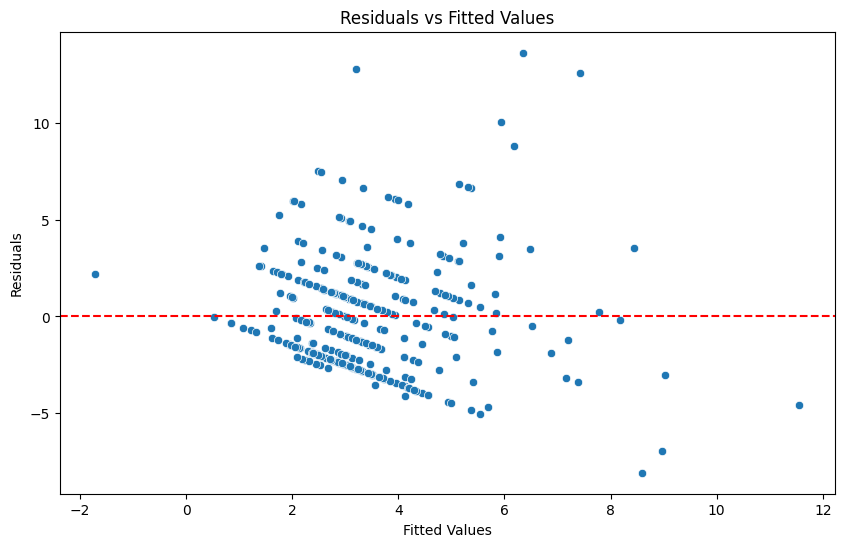

In [25]:

gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

The null hypothesis of The Goldfeld-Quandt Test would tell us that the variance of the residuals would be constant throughout the independent variables. In this case, since the p-value is 2.355242749713596e-10 which is below 0.05 that means we would have to reject the null hypothesis and so there is heteroscedasticity.

The graph shows that many of the points are spread across the middle of the line. Since many of them still aren't on the line or near it I would say that this shows that this supports rejecting the null hypothesis.
